In [43]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('Data/ADANIPORTS.csv', index_col='Date', parse_dates=True)
# only 500 rows for analysis
df = df.asfreq('D', method='bfill')
df = df[-500:]

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-11,771.0,784.950012,749.049988,759.900024,749.632446,8985117
2022-05-12,759.0,759.000000,705.299988,713.299988,703.661987,10570456
2022-05-13,727.0,735.900024,701.799988,705.900024,696.362000,7247809
2022-05-14,715.0,728.150024,704.000000,712.500000,702.872803,5606071
2022-05-15,715.0,728.150024,704.000000,712.500000,702.872803,5606071


In [46]:
df1 = df.dropna()

In [47]:
df1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,848.049988,848.049988,828.150024,831.250000,831.250000,2801202
2023-09-19,832.000000,837.599976,815.000000,818.049988,818.049988,3016411
2023-09-20,832.000000,837.599976,815.000000,818.049988,818.049988,3016411
2023-09-21,821.150024,842.400024,820.000000,831.099976,831.099976,6437320
2023-09-22,833.900024,838.700012,822.099976,827.049988,827.049988,3155839


In [48]:
cols = ['Open', 'High', 'Low', 'Close']

In [49]:
for colum in cols:
    df1[colum] = df1[colum].astype(float)

<Axes: xlabel='Date'>

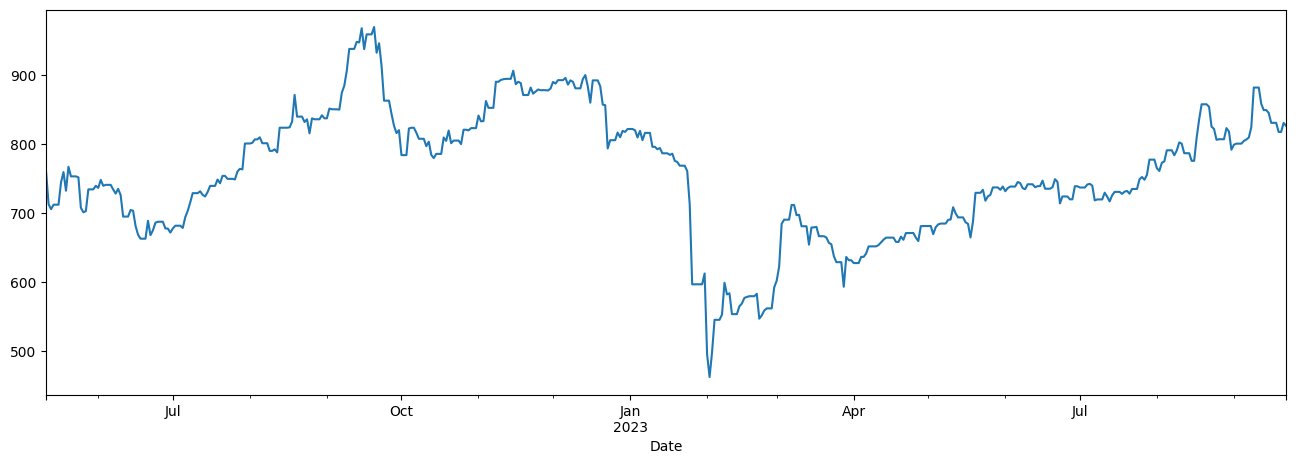

In [50]:
df1['Close'].plot(figsize=(16,5))

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
result = seasonal_decompose(df1['Close'])

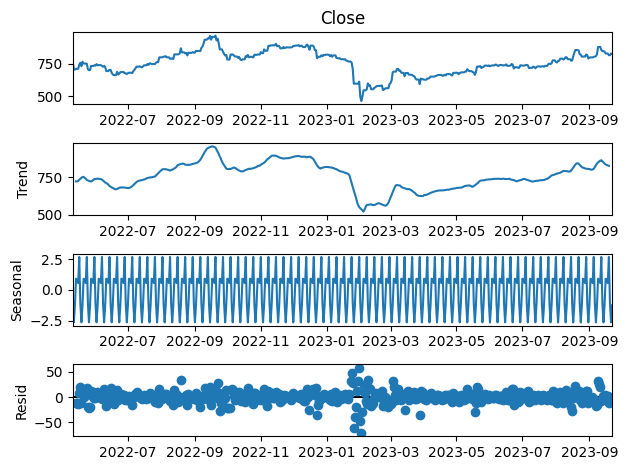

In [53]:
result.plot();

<Axes: xlabel='Date'>

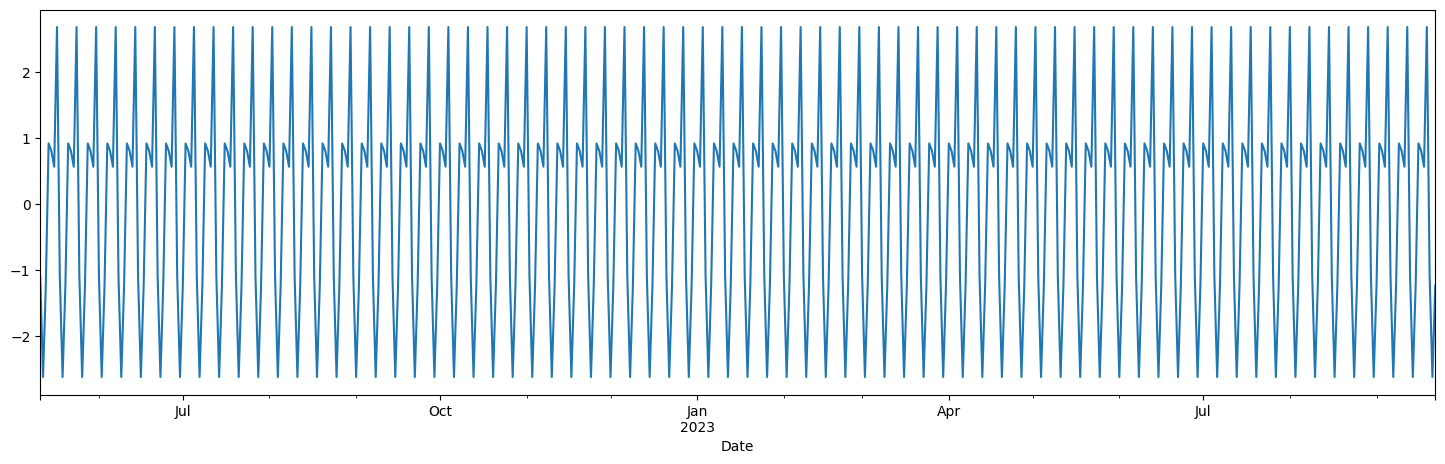

In [54]:
result.seasonal.plot(figsize=(18,5))

In [55]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [56]:
from pmdarima import auto_arima

In [57]:
auto_arima(df1['Close'], seasonal=True, m=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2071.839
Date:                Sun, 26 Nov 2023   AIC                           4145.678
Time:                        17:28:21   BIC                           4149.890
Sample:                    05-11-2022   HQIC                          4147.331
                         - 09-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       236.5362      5.170     45.747      0.000     226.402     246.670
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):              4798.46
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model = SARIMAX(train['Close'], order=(0,1,0), seasonal_order=(2,0,0,7), enforce_invertibility=False)

In [60]:
result = model.fit()

In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  436
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 7)   Log Likelihood               -1813.572
Date:                           Sun, 26 Nov 2023   AIC                           3633.144
Time:                                   17:28:21   BIC                           3645.370
Sample:                               05-11-2022   HQIC                          3637.969
                                    - 07-20-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.0554      0.028      1.996      0.046       0.001       0.110
ar.S.L14       0.0146      0.049      0.296      0.767      -0.082       0.111
sigma2       244.7721      6.213     39.395      0.000     232.594     256.950
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              4175.91
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start = len(train)
end = len(test)+len(train) -1

In [63]:
predictions = result.predict(start, end).rename("SARIMA Model")

<Axes: xlabel='Date'>

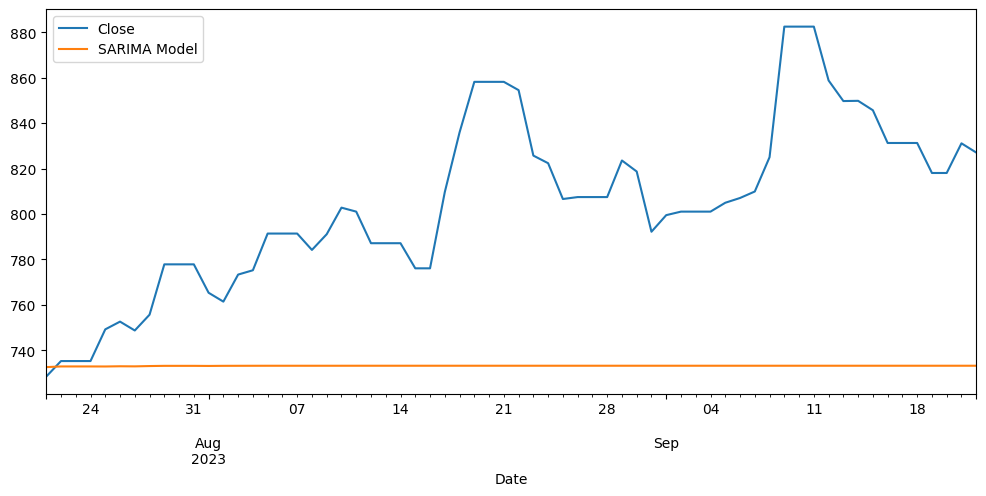

In [64]:
test['Close'].plot(figsize=(12,5), legend = True)
predictions.plot(legend = True)

In [65]:
from statsmodels.tools.eval_measures import rmse

In [66]:
rmse(test['Close'], predictions)

80.30883583492417

In [67]:
test['Close'].mean()

804.5531263124999

In [68]:
auto_arima(df1['Close'], X = df1[['Open', 'High', 'Low']], seasonal=True, m=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1619.236
Date:                Sun, 26 Nov 2023   AIC                           3254.472
Time:                        17:28:29   BIC                           3288.189
Sample:                    05-11-2022   HQIC                          3267.703
                         - 09-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5732      4.697      0.122      0.903      -8.632       9.778
Open          -0.5811      0.023    -25.216      0.000      -0.626      -0.536
High           0.8456      0.025     33.525      0.000       0.796       0.895
Low            0.7333      0.012     63.653      0.000       0.711       0.756
ar.L1         -0.4473      0.130     -3.432      0.001      -0.703      -0.192
ar.L2          0.1101      0.050      2.215      0.027       0.013       0.207
ma.L1          0.7539      0.127      5.942      0.000       0.505       1.003
sigma2        38.1398      1.456     26.203      0.000      35.287      40.993
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1771.84
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
model = SARIMAX(train['Close'], exog=train[['Open', 'High', 'Low']],order=(2,0,1), seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [70]:
result = model.fit()

In [71]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  436
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -1434.637
Date:                           Sun, 26 Nov 2023   AIC                           2887.274
Time:                                   17:28:30   BIC                           2923.972
Sample:                               05-11-2022   HQIC                          2901.757
                                    - 07-20-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5587      0.024    -23.461      0.000      -0.605      -0.512
High           0.8300      0.020     41.060      0.000       0.790       0.870
Low            0.7272      0.012     61.013      0.000       0.704       0.751
ar.L1          0.0687      0.507      0.135      0.892      -0.925       1.062
ar.L2         -0.0169      0.141     -0.120      0.904      -0.292       0.259
ma.L1          0.2109      0.501      0.421      0.673      -0.770       1.192
ar.S.L7        0.0776      1.652      0.047      0.963      -3.160       3.315
ma.S.L7       -0.1108      1.653     -0.067      0.947      -3.351       3.129
sigma2        42.4514      1.630     26.038      0.000      39.256      45.647
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1676.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.34
Prob(H) (two-sided):                  0.75   Kurtosis:                        12.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
start = len(train)
end = len(test)+len(train) -1

In [73]:
predictions = result.predict(start, end, exog = test[['Open', 'High', 'Low']])

<Axes: xlabel='Date'>

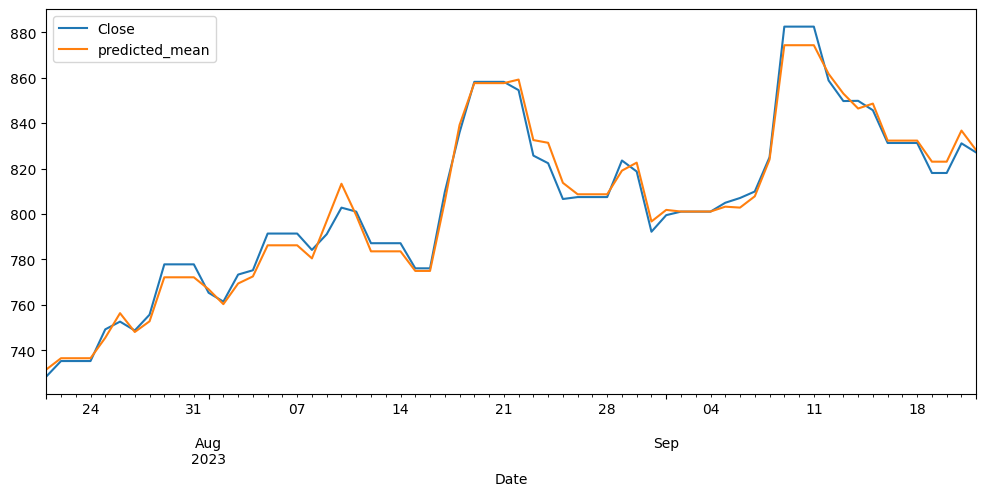

In [74]:
test['Close'].plot(figsize=(12,5), legend = True)
predictions.plot(legend = True)